# **ANÁLISE DE TRANSIÇÃO E CLASSIFICAÇÃO DE USO DO SOLO NO MUNICÍPIO DE CAMPO VERDE - MT**



- **Nome:** <font color="darkblue">Grazieli Rodigheri</font>

- **Disciplina:** <font color="darkblue">Introdução a Data Science</font>

- **Apresentação:** <font color="darkblue">04 de dezembro 2020</font>

<hr color = "blue" style="border: 1px solid #0984e3;">

## **1. Introdução**

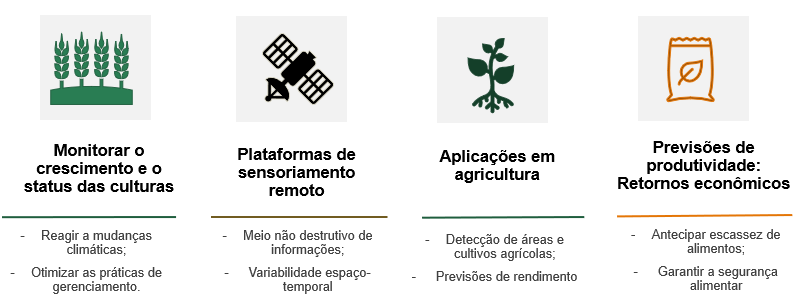

## **2. Descrição dos Dados de entrada**


> ### 2.1 Dados de referência


<figure style="margin:auto">
<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/8859/8301438/8263605/feito1-2789120-large.gif" align="right" width="400"/>
</figure>


<p style="text-align:justify;">
Os dados de referência foram obtidos de uma base de dados coletada no município de Campo Verde - MT e disponibilizada por Sanches et al. (2018).
O município de Campo Verde possui uma área agrícola altamente dinâmica, onde são usados sistemas de cultivo duplo, rotação lavoura-pecuária e sistemas de plantio direto. Nesta base de dados, foram coletados os seguintes dados de referência:


 
*   Formas e classes de uso do solo de 518 campos para o período de outubro de 2015 a julho de 2016, que abrange a safra brasileira 2015/2016;
   


> ### 2.2 Dados obtidos de sensoriamento remoto

<p style="text-align:justify;">
Foram utilizados dados de sensoriamento remoto para avaliar os usos e cobertura do solo em todo o município, tendo como base os dados de referência obtidos a campo.
Para tanto, foram obtidas imagens de Radar de Abertura Sintética (SAR) do satélite Sentinel 1, através da plataforma Google Earth Engine (GEE), com as seguintes configurações:

*   Resolução espacial: 10 m
*   Resolução temporal: 12 dias
*   Polarização: VH 
*   Modo de aquisição: Interferometric Wide (IW)
*   Coleção de imagens do tipo GRD, da Banda C 
*   Pré-processamento: Remoção de ruído de borda, Remoção de ruído térmico,
Calibração radiométrica, Calibração geométrica;



As imagens foram adiquiridas para o perído de 05-10-2015 até 25-05-2016, constituindo uma série temporal de 34 imagens. A partir destas foram calculadas algumas métricas como mínimo, máximo, média e amplitude da série temporal.

## **3. Objetivo do trabalho**

> ### 3.1 Objetivo Geral

Analisar as principais transições de uso do solo e classificar as demais áreas do município usando técnicas de Machine Learning.

> ### 3.2 Objetivos específicos

1.   Verificar os tipos de culturas presentes na área amostral;
2.   Analisar as transições ocorridas dentro do perído de estudo;
3.   Realizar a classificação de toda a área do município com base nos dados de referência;
4.   Gerar uma classificação final avaliando as áreas de agricultura de 1 ou 2 ciclos.



## **4. Desenvolvimento e Resultados do trabalho**

> ### 4.1 Instalação e importação dos pacotes utilizados e leitura dos dados de referência 

In [ ]:
# !pip install geopandas

In [ ]:
# Pacotes utilizados
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.graph_objects as go

In [ ]:
# Monta o Google Drive para acessar os arquivos
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define o caminho da shape
filename = '/content/drive/My Drive/Data-science/CampoVerde.shp'

# Lê a shape como um dataframe
shapes = gpd.read_file(filename)
shapes.head(5)

,Id,num_tl,area,Out_2015,Nov_2015,Dez_2015,jan_2016,Fev_2016,Mar_2016,Abr_2016,Mai_2016,Jun_2016,Jul_2016,geometry
0,0,0.0,23,Soil,Soil,Soybean,Soybean,Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693318.133 8299706.779, 693641.029 8..."
1,0,1.0,418,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((694457.384 8300546.989, 694529.351 8..."
2,0,2.0,90,Soil,Soil,Soybean,Soybean,Soybean,Soil,Maize,Maize,Maize,Soil,"POLYGON ((695201.838 8302660.731, 695343.931 8..."
3,0,3.0,213,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693189.605 8298719.362, 693276.698 8..."
4,0,4.0,267,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693162.814 8298666.245, 693191.845 8..."


In [ ]:
# Vê a quantidade de observações
tamdados = len(shapes)
print("Quantidade de dados:", tamdados)

Quantidade de dados: 518


> ### 4.2 Organização dos dados e obtenção de todas as culturas presentes na área amostral

Para verificar as culturas presentes na área amostral, antes foram renomeadas e selecionadas algumas colunas do dataframe

In [ ]:
# Renomeia algumas colunas do dataframe
shapes.rename(columns={
    'jan_2016':'Jan_2016',
    'area':'Area (ha)',
    'geometry':'Geometry' 
}, inplace=True)

# Seleciona somente algumas colunas do dataframe
shapes = shapes[['Area (ha)','Out_2015','Nov_2015','Dez_2015','Jan_2016','Fev_2016','Mar_2016','Abr_2016','Mai_2016','Jun_2016','Jul_2016']] 

# Apresenta alguns dados
shapes.head(5)

,Area (ha),Out_2015,Nov_2015,Dez_2015,Jan_2016,Fev_2016,Mar_2016,Abr_2016,Mai_2016,Jun_2016,Jul_2016
0,23,Soil,Soil,Soybean,Soybean,Soil,Cotton,Cotton,Cotton,Cotton,Cotton
1,418,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton
2,90,Soil,Soil,Soybean,Soybean,Soybean,Soil,Maize,Maize,Maize,Soil
3,213,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton
4,267,Soil,Soybean,Soybean,Soil,Soil,Cotton,Cotton,Cotton,Cotton,Cotton


Essa organização facilitou a obtenção dos nomes das culturas presentes na área amostral.

In [ ]:
# Lista contendo os nomes de todas as culturas
lista_geral_nomes_culturas = []

# Para cada período (coluna), verifica os valores únicos
colunas = ['Out_2015','Nov_2015','Dez_2015','Jan_2016','Fev_2016','Mar_2016','Abr_2016','Mai_2016']
for coluna in colunas:
    # Obtém os valores não repetidos da coluna
    culturas_periodo = shapes[coluna].unique()
    
    # Para esses valores únicos, adiciona na lista geral se o valor não está lá
    for cultura in culturas_periodo:
        if (cultura not in lista_geral_nomes_culturas):
            lista_geral_nomes_culturas.append( cultura )

            
# Apresenta todas as culturas encontradas
for cultura in lista_geral_nomes_culturas:
    print(cultura)

Soil
Pasture
Cerrado
NCC_crotalaria
Eucalyptus
Turfgrass
NCC_grasses
Soybean
Maize
NCC_millet
Beans
Sorghum
NCC_brachiaria
Cotton


OBS: **Objetivo 1 alcançado!** 

Esta etapa do trabalho foi importante para posteriormente agrupar as diferentes culturas em classes

> ### 4.3 Agrupamento em classes e análise de transições no período de estudo 

Nessa etapa foram feitas as seleções do período de análise de estudo e das classes de uso do solo:

*   Foram selecionados apenas 4 meses para avaliar as transições, sendo estas: **Outubro-Dezembro, Dezembro-Fevereiro e Fevereiro-Maio**. 
*   Além disso, as culturas foram agrupadas em classes maiores, sendo estas: 


0.   **Agricultura**
1.   **Solo exposto**
2.   **Pastagem**
3.   **Floresta plantada**
4.   **Cerrado**





In [ ]:
# Seleciona os meses de interesse
shapes_amostras = shapes[['Out_2015','Dez_2015','Fev_2016','Mai_2016']]
shapes_amostras.head(5)

,Out_2015,Dez_2015,Fev_2016,Mai_2016
0,Soil,Soybean,Soil,Cotton
1,Soil,Soybean,Soil,Cotton
2,Soil,Soybean,Soybean,Maize
3,Soil,Soybean,Soil,Cotton
4,Soil,Soybean,Soil,Cotton


In [ ]:
# Agrupa as diferentes culturas em classes
classes = dict([
  ('Soybean', 0),         # Agricultura
  ('Pasture', 2),         # Pastagem
  ('Soil', 1),            # Solo
  ('Eucalyptus', 3),      # Floresta Plantada
  ('Cerrado', 4),         # Cerrado
  ('NCC_millet', 2),      # Pastagem
  ('NCC_crotalaria', 2),  # Pastagem
  ('NCC_grasses', 2),     # Pastagem
  ('Maize', 0),           # Agricultura
  ('Cotton', 0),          # Agricultura
  ('Turfgrass', 2),       # Pastagem
  ('NCC_brachiaria', 2),  # Pastagem
  ('Sorghum', 0),         # Agricultura
  ('Beans', 0)            # Agricultura
])

# Para cada período selecionado cria uma nova coluna com atribuição de valores às classes
colunas = ['Out_2015','Dez_2015','Fev_2016','Mai_2016']
for coluna in colunas:
    valores_coluna = shapes_amostras[coluna]
    
    # Para cada cultura da coluna, atribui a classe
    lista_classes_periodo = []
    for cultura in valores_coluna:
      # Busca no dicionário o nome
      classe = classes[cultura]
      # Adiciona o valor na lista
      lista_classes_periodo.append(classe)

    # Cria uma nova coluna com as classes atribuídas
    shapes_amostras[coluna+'_classes'] = lista_classes_periodo

shapes_amostras.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Out_2015,Dez_2015,Fev_2016,Mai_2016,Out_2015_classes,Dez_2015_classes,Fev_2016_classes,Mai_2016_classes
0,Soil,Soybean,Soil,Cotton,1,0,1,0
1,Soil,Soybean,Soil,Cotton,1,0,1,0
2,Soil,Soybean,Soybean,Maize,1,0,0,0
3,Soil,Soybean,Soil,Cotton,1,0,1,0
4,Soil,Soybean,Soil,Cotton,1,0,1,0
5,Soil,Soybean,Soil,Cotton,1,0,1,0
6,Soil,Soybean,Soil,Cotton,1,0,1,0
7,Soil,Soybean,Soil,Cotton,1,0,1,0
8,Soil,Soybean,Soil,Cotton,1,0,1,0
9,Soil,Soil,Soil,Cotton,1,1,1,0


Então, com as classes agrupadas, foi possível observar as transições ocorridas em cada período selecionado e, a partir disso, criar o diagrama de Sankey.

In [ ]:
# Inicializa as listas de interações para o diagrama Sankey
source_sankey = []
target_sankey = []
value_sankey = []
colors_sankey = []

# Cria as cores das transições
colors = dict([
  (0, '#009900'),
  (1, '#F98D33'),
  (2, '#9FA1A3'),
  (3, '#2F6016'),
  (4, '#E9E668')
])

# Verifica todas as combinações de mudanças entre Out-Dez
print("======================================")
print("Outubro2015 -> Dezembro2015")
for i in range(0,5):
    for j in range(0,5):
        # Obtém uma coluna de True/False se a combinação
        match = (shapes_amostras['Out_2015_classes']==i) & (shapes_amostras['Dez_2015_classes']==j)
        # Obtém a quantidade de valores onde ocorre a combinação
        quantidade_valores = len(match[match == True])
        # Se houve mudança, computa os dados
        if (quantidade_valores != 0):
            print(i, j, quantidade_valores)
            source_sankey.append(i)
            target_sankey.append(j+5)
            value_sankey.append(quantidade_valores)
            colors_sankey.append(colors[i])
            
# Verifica todas as combinações de mudanças entre Dez-Fev
print("======================================")
print("Dezembro2015 -> Fevereiro2016")
for i in range(0,5):
    for j in range(0,5):
        # Obtém uma coluna de True/False se a combinação
        match = (shapes_amostras['Dez_2015_classes']==i) & (shapes_amostras['Fev_2016_classes']==j)
        # Obtém a quantidade de valores onde ocorre a combinação
        quantidade_valores = len(match[match == True])
        # Se houve mudança, computa os dados
        if (quantidade_valores != 0):
            print(i, j, quantidade_valores)
            source_sankey.append(i+5)
            target_sankey.append(j+10)
            value_sankey.append(quantidade_valores)
            colors_sankey.append(colors[i])

# Verifica todas as combinações de mudanças entre Fev-Dez
print("======================================")
print("Fevereiro2016 -> Maio2016")
for i in range(0,5):
    for j in range(0,5):
        # Obtém uma coluna de True/False se a combinação
        match = (shapes_amostras['Fev_2016_classes']==i) & (shapes_amostras['Mai_2016_classes']==j)
        # Obtém a quantidade de valores onde ocorre a combinação
        quantidade_valores = len(match[match == True])
        # Se houve mudança, computa os dados
        if (quantidade_valores != 0):
            print(i, j, quantidade_valores)
            source_sankey.append(i+10)
            target_sankey.append(j+15)
            value_sankey.append(quantidade_valores)
            colors_sankey.append(colors[i])

# Mostra as listas
print(source_sankey)
print(target_sankey)
print(value_sankey)
print(colors_sankey)


Outubro2015 -> Dezembro2015
0 0 5
1 0 354
1 1 48
1 2 19
2 0 1
2 1 1
2 2 59
3 3 16
4 4 15
Dezembro2015 -> Fevereiro2016
0 0 193
0 1 167
1 0 9
1 1 40
2 1 24
2 2 54
3 3 16
4 4 15
Fevereiro2016 -> Maio2016
0 0 180
0 1 4
0 2 18
1 0 226
1 2 5
2 2 54
3 1 2
3 3 14
4 4 15
[0, 1, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 13, 13, 14]
[5, 5, 6, 7, 5, 6, 7, 8, 9, 10, 11, 10, 11, 11, 12, 13, 14, 15, 16, 17, 15, 17, 17, 16, 18, 19]
[5, 354, 48, 19, 1, 1, 59, 16, 15, 193, 167, 9, 40, 24, 54, 16, 15, 180, 4, 18, 226, 5, 54, 2, 14, 15]
['#009900', '#F98D33', '#F98D33', '#F98D33', '#9FA1A3', '#9FA1A3', '#9FA1A3', '#2F6016', '#E9E668', '#009900', '#009900', '#F98D33', '#F98D33', '#9FA1A3', '#9FA1A3', '#2F6016', '#E9E668', '#009900', '#009900', '#009900', '#F98D33', '#F98D33', '#9FA1A3', '#2F6016', '#2F6016', '#E9E668']


In [ ]:
# Cria o diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
   node = dict(
     pad = 15,
     thickness = 20,
     line = dict(color = "black", width = 0.5),
     label = ["OUT_agricultura","OUT_solo","OUT_pastagem","OUT_floresta","OUT_cerrado",
              "DEZ_agricultura","DEZ_solo","DEZ_pastagem","DEZ_floresta","DEZ_cerrado",
              "FEV_agricultura","FEV_solo","FEV_pastagem","FEV_floresta","FEV_cerrado",
              "MAI_agricultura","MAI_solo","MAI_pastagem","MAI_floresta","MAI_cerrado"],
     color = ["#117D11","#D97405","#6A706D","#2B632C","#A9B418",
              "#117D11","#D97405","#6A706D","#2B632C","#A9B418",
              "#117D11","#D97405","#6A706D","#2B632C","#A9B418",
              "#117D11","#D97405","#6A706D","#2B632C","#A9B418"]   
   ),
   link = dict(
        source = source_sankey,
        target = target_sankey,
        value =  value_sankey,
        color = colors_sankey
 ))])

fig.update_layout(title_text="Gráfico de transições - Sankey", font_size=11, title_font_size=25)
fig.show()

OBS: **Objetivo 2 alcançado!** 

Foi possível observar as principais transições ocorridas nos diferentes períodos. Entre elas, as que mais se destacam são as sucessões ocorridas entre **solo exposto e agricultura**




> ### 4.4 Classificação das imagens SAR

>> #### 4.4.1 Importação dos pacotes para classificação

In [ ]:
# Importa os pacotes necessários

try:
  import geemap
  print('geemap importado!')
except ImportError:
  import subprocess
  print('geemap package not installed. Installing ...')
  subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

# Verifica se o notebook está rodando no Colab
try:
    import google.colab
    import geemap.eefolium as emap
except:
    import geemap as emap

geemap importado!


In [ ]:
# Pacotes utilizados para a matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Autentica e inicializa o GEE
import ee
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()    

>> #### 4.4.2 Obtenção da imagem a ser classificada 

In [ ]:
# Importa do GEE as shapes da cidade, dos campos e a coleção S1
SHP_CampoVerde = ee.FeatureCollection("users/grazielirodigheri/SHP_CampoVerde")
SHP_FieldsCampoVerde = ee.FeatureCollection("users/grazielirodigheri/ShapefileCampoVerdeClassificada")
S1_GRD = ee.ImageCollection("COPERNICUS/S1_GRD")
    
# Obtém as imagens VH do Sentinel1
SAR_VH = S1_GRD \
  .filterDate('2015-10-01', '2016-05-30') \
  .filterBounds(SHP_CampoVerde) \
  .select('VH')

# Obtém as métricas da série
max = SAR_VH.max().rename("max")
min = SAR_VH.min().rename("min")
mean = SAR_VH.mean().rename("mean")
amplitude = max.subtract(min).rename("amplitude")

# Adiciona cada métrica como a banda de uma nova imagem
image_VH = max.addBands(min).addBands(mean).addBands(amplitude)

# Corta a imagem com base na shape da cidade
image_VH = image_VH.clip(SHP_CampoVerde)

# Cria uma composição falsa cor de 'min','mean','amplitude'
params = {
  'bands': ['min', 'mean', 'amplitude'], 
  'min': [-24.33, -18.08, 1.12], 
  'max': [-14.54, -13.18, 10.8], 
  'gamma': 1
}
Map2 = emap.Map(center=[40,-100], zoom=4)
Map2.addLayer(image_VH, params, "RADAR_VH")
# Map2.addLayer(SHP_FieldsCampoVerde,{},'SHP_FieldsCampoVerde');
Map2.setCenter(-55.0, -15.4, 10)
Map2.addLayerControl()
Map2

>> #### 4.4.3 Classificações dos usos e cobertura do solo para Dezembro e Maio

Exatidão Global DEZ2015: 0.775894149266074


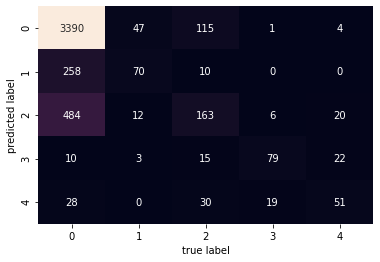

In [ ]:
Map3 = emap.Map(center=[40,-100], zoom=4)
Map3.setCenter(-55.0, -15.4, 10)

# ====================================================================
# ========== CLASSIFICAÇÃO DA IMAGEM COM CLASSES DE DEZ ==============
# ====================================================================

# Obtém as amostras da imagem com base na classe de dezembro
AmostrasImagemShape = image_VH.sampleRegions(**{
  'collection': SHP_FieldsCampoVerde,
  'properties': ['Dez_2015_class'],
  'scale': 200
});

# ====================================================================
# Separa os dados em treinamento e teste
ShapeColunaAleatoria = AmostrasImagemShape.randomColumn('random');
split = 0.7;
DadosTreino = ShapeColunaAleatoria.filter(ee.Filter.lt('random', split));
DadosTeste = ShapeColunaAleatoria.filter(ee.Filter.gte('random', split));

#  ====================================================================
#  Treina o classificador
ClassificadorTreinado = ee.Classifier.smileRandomForest(200).train(**{
  'features': DadosTreino,
  'classProperty': 'Dez_2015_class',
  'inputProperties': ['min','max','mean','amplitude']
});

# ====================================================================
# Classifica a imagem
imagem_classificada_dez = image_VH.classify(ClassificadorTreinado);
Map3.addLayer(
  imagem_classificada_dez, \
  {'min': 0, 'max': 4, 'palette': ['#00ad00','#cc8400','#007000','#042905','#d8d800']}, \
  'Classificação Classes DEZ2015')

# Classifica a partição de teste
DadosTesteClassificados = DadosTeste.classify(ClassificadorTreinado);

# ====================================================================
# Calcula a matriz de confusão da partição teste classificada
confusionMatrix = DadosTesteClassificados.errorMatrix('Dez_2015_class', 'classification');

# Apresenta a matriz
sns.heatmap(confusionMatrix.getInfo(), square=False, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Obtém a exatidão global dos dados de teste classificados
exatidaoglobal = confusionMatrix.accuracy().getInfo()
print("Exatidão Global DEZ2015:", exatidaoglobal)

# Apresenta o mapa
Map3.addLayerControl()
Map3


Exatidão Global MAI2016: 0.8615702479338843


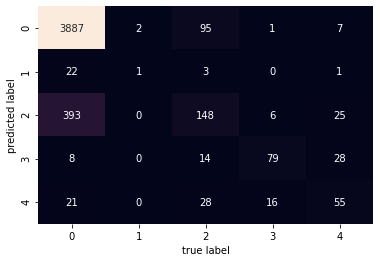

In [ ]:
Map3 = emap.Map(center=[40,-100], zoom=4)
Map3.setCenter(-55.0, -15.4, 10)

# ====================================================================
# ========== CLASSIFICAÇÃO DA IMAGEM COM CLASSES DE MAI ==============
# ====================================================================

# Obtém as amostras da imagem com base na classe de maio
AmostrasImagemShape = image_VH.sampleRegions(**{
  'collection': SHP_FieldsCampoVerde,
  'properties': ['Mai_2016_class'],
  'scale': 200
});

# ====================================================================
# Separa os dados em treinamento e teste 
ShapeColunaAleatoria = AmostrasImagemShape.randomColumn('random');
split = 0.7;
DadosTreino = ShapeColunaAleatoria.filter(ee.Filter.lt('random', split));
DadosTeste = ShapeColunaAleatoria.filter(ee.Filter.gte('random', split));

#  ====================================================================
#  Treina o classificador
ClassificadorTreinado = ee.Classifier.smileRandomForest(200).train(**{
  'features': DadosTreino,
  'classProperty': 'Mai_2016_class',
  'inputProperties': ['min','max','mean','amplitude']
});

# ====================================================================
# Classifica a imagem
imagem_classificada_mai = image_VH.classify(ClassificadorTreinado);
Map3.addLayer(
  imagem_classificada_mai, \
  {'min': 0, 'max': 4, 'palette': ['#00ad00','#cc8400','#007000','#042905','#d8d800']}, \
  'Classificação Classes MAI2016')

# Classifica a partição de teste
DadosTesteClassificados = DadosTeste.classify(ClassificadorTreinado);

# ====================================================================
# Calcula a matriz de confusão da partição teste classificada
confusionMatrix = DadosTesteClassificados.errorMatrix('Mai_2016_class', 'classification');

# Apresenta a matriz
sns.heatmap(confusionMatrix.getInfo(), square=False, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Obtém a exatidão global dos dados de teste classificados
exatidaoglobal = confusionMatrix.accuracy().getInfo()
print("Exatidão Global MAI2016:", exatidaoglobal)

# Apresenta o mapa
Map3.addLayerControl()
Map3


> ### 4.5 Classificação de áreas agrícolas de 1 ou 2 ciclos anuais

In [ ]:
Map4 = emap.Map(center=[40,-100], zoom=4)
Map4.setCenter(-55.0, -15.4, 10)

# Soma as imagens classificadas de dezembro e maio apenas para avaliar áreas de agricultura e solo
soma = imagem_classificada_dez.add(imagem_classificada_mai)

# Após a soma, áreas em 0 serão agricultura 2 ciclos, 1 serão 1 ciclo e 2 serão outros
Map4.addLayer(soma, {'min':0, 'max':2, 'palette':['#006400','ff0000', 'ffa500']}, 'SOMA')

# Apresenta o mapa
Map4.addLayerControl()
Map4


## **5. Considerações finais**


*   Através da análise de transição, pode-se verificar o comportamento das principais culturas presentes na área amostral;
*   A classificação usando o algoritmo de Machine Learning Ranfom Forest mostra boa acurácia para avaliar os usos e cobertura do solo no município de Campo Verde - MT;
*   O uso de dados SAR permite a utilização de uma série temporal para classificar os usos do solo, sem sofrer interferências das condições do tempo. 



## **6. Referências**

Sanches, I. D. et al. Campo Verde database: Seeking to improve agricultural remote sensing of tropical areas. IEEE Geoscience and Remote Sensing Letters, vol. 15, n.3, pp. 369-373, 2018.